# Problems

## Import Python Modules

In [691]:
# Import modules used throughout the workbook.

# https://numpy.org/doc/stable/user/index.html
import numpy as np

# https://matplotlib.org/stable/users/index
import matplotlib.pyplot as plt

# https://docs.python.org/3/library/math.html
import math

# https://docs.python.org/3/library/itertools.html
import itertools

# https://docs.scipy.org/doc/scipy/index.html
import scipy.stats as stats

# https://seaborn.pydata.org/index.html
import seaborn as sns

## Problem 1: Extending the Lady Tasting Tea

The Lady Tasting Tea experiment, designed by statistician Ronald A. Fisher, investigated Dr Muriel Bristol's claim that she could distinguish whether milk or tea was poured first into a cup. Fisher set up an experiment with eight cups of tea, four with milk first and four with tea first, arranged in random order. Bristol's task was to correctly identify which cups were which. Fisher used this setup to demonstrate how to form a null hypothesis (she is guessing) and evaluate the probability of correctly identifying all cups by chance.

Here we extend the original eight cup experiment to twelve cups of tea, four with milk first and eight with tea first. Using `numpy`, we will simulate the exteded design and compare the results with the original eight cup experiment.

References:
- https://www.irishtimes.com/news/science/how-a-tea-tasting-test-led-to-a-breakthrough-in-statistics-1.3998786
- https://en.wikipedia.org/wiki/Lady_tasting_tea
- https://www.youtube.com/watch?v=8ERFV7rV0vg&t=901s&pp=ygUQbGFkeSB0YXN0aW5nIHRlYQ%3D%3D

### Extended 12 Cup Experiment

To set up the extended 12-cup experiment, we can use ``math.comb(n, k)`` to calculate the number of ways to choose 4 cups out of 12, where order does not matter and no cup is selected more than once. There are 495 possible combinations in total. This means that if the cups are selected at random, the probability of correctly identifying all 4 milk-first cups is 1 in 495.

In [692]:
# Number of cups
cups = 12
milk_first = 4

# Function to calculate combinations and print result.
def combos(cups, milk_first):
    # https://docs.python.org/3/library/math.html#math.comb
    combinations = math.comb(cups, milk_first)
    print(f"Total combinations when choosing {milk_first} from {cups}: {combinations}")
    print(f"Probability of correctly identifying 4 milk first cups: 1/{combinations}")

# Run the function.
combos(cups, milk_first)

Total combinations when choosing 4 from 12: 495
Probability of correctly identifying 4 milk first cups: 1/495


We can further illustrate this by labeling the cups and using itertools.combinations to generate all possible combinations of four cups. The resulting list contains 495 combinations, confirming our calculation.

In [693]:
# Function to label cups and create a list of all combinations.
def labelled_combos(cups, milk_first):
    # Label the 12 cups.
    # https://numpy.org/doc/stable/reference/generated/numpy.arange.html
    cup_labels = np.arange(cups)

    # Generate all combinations.
    # https://docs.python.org/3/library/itertools.html#itertools.combinations
    combinations = list(itertools.combinations(cup_labels, milk_first))
    
    return cup_labels, combinations

# Run the function.
cup_labels, combinations = labelled_combos(cups, milk_first)

# Print results.
print(f"Cup labels: {cup_labels}")
print(f"Total combinations: {len(combinations)}")
print(f"First 5 Combinations: {combinations[:5]}")

Cup labels: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Total combinations: 495
First 5 Combinations: [(0, 1, 2, 3), (0, 1, 2, 4), (0, 1, 2, 5), (0, 1, 2, 6), (0, 1, 2, 7)]


Next, we randomly select the milk-first cups using ``numpy.random.choice`` and compare the selected four cups to the list of all possible combinations. By using Python’s ``set intersection method``, we can determine how many milk-first cups appear in each combination.

In [694]:
# Function to randomly shuffle the milk first cups and get the interection.
def matches(cups, milk_first):
    cup_labels, combinations = labelled_combos(cups, milk_first)
    # Label the milk first cups.
    # https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html#numpy-random-rand
    milk_first_labels = np.random.choice(cup_labels, milk_first, replace=False)

    total_matches = []
    cups_chosen = []
    number = []
    loop = 0
    # Loop through all combinations.
    for comb in combinations:
        # Return the common elements between sets.
        # https://docs.python.org/3/library/stdtypes.html#frozenset.intersection
        match = set(comb).intersection(set(milk_first_labels))
        # Add the count of common elements to a list.
        total_matches.append(len(match))
        # Loop through first 5 sets for printing results.
        loop += 1
        if loop < 6:
            cups_chosen.append(comb)
            number.append(len(match))
    
    return milk_first_labels, cups_chosen, number, total_matches


# Run the function.
x = matches(cups, milk_first)

# Print results.
print(f"Milk first labels: {x[0]}")
print("First 5 sets:")
index = 0
for i in x[1]:
    print(f"Cups chosen: {i}, Number of milk first cups: {x[2][index]}")
    index += 1

Milk first labels: [4 2 9 0]
First 5 sets:
Cups chosen: (0, 1, 2, 3), Number of milk first cups: 2
Cups chosen: (0, 1, 2, 4), Number of milk first cups: 3
Cups chosen: (0, 1, 2, 5), Number of milk first cups: 2
Cups chosen: (0, 1, 2, 6), Number of milk first cups: 2
Cups chosen: (0, 1, 2, 7), Number of milk first cups: 2


Now that we have the number of milk-first cups in each combination, we can use ``np.unique`` to count the outcomes and calculate the probability of correctly identifying 0, 1, 2, 3, or all 4 cups. We can also visualize these results using ``matplotlib.pyplot``.

In [695]:
# Function to get the count.
def get_count(cups, milk_first, printing=False):
    total_matches = matches(cups, milk_first)[3]
    # Get the counts.
    # https://numpy.org/doc/stable/reference/generated/numpy.unique.html
    count = np.array(np.unique(total_matches, return_counts=True))

    # Loop through to print the probabilities.
    prob = []
    if printing:
        index = 0
        for cup in count[0]:
            fraction = f"{(count[1][index])}/{(sum(count[1]))}"
            probability = (count[1][index])/(sum(count[1]))
            prob.append(probability)
            print(f"Probability of choosing {cup} cups correctly: {fraction} ({probability:.4f})")
            index += 1

    return count, prob

Probability of choosing 0 cups correctly: 70/495 (0.1414)
Probability of choosing 1 cups correctly: 224/495 (0.4525)
Probability of choosing 2 cups correctly: 168/495 (0.3394)
Probability of choosing 3 cups correctly: 32/495 (0.0646)
Probability of choosing 4 cups correctly: 1/495 (0.0020)


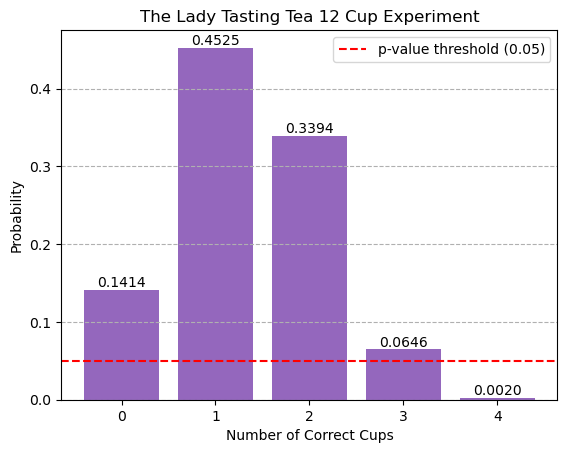

In [696]:
# Run the function to get count, probabilities.
count_12, prob_12 = get_count(cups, milk_first, printing=True)

# Plot the probabilities.
fig, ax = plt.subplots()

# Set x & y variables.
x_12 = count_12[0]
y_12 = prob_12

# Set p-value threshold.
y_pvalue = 0.05

# Set the colour.
color_12 = 'tab:purple'

# Generate the bar chart.
bar_12 = ax.bar(x_12, y_12, color=color_12)

# Add title, labels and grid.
ax.set_title(f"The Lady Tasting Tea {cups} Cup Experiment")
ax.set_xlabel("Number of Correct Cups")
ax.set_ylabel("Probability")
ax.grid(axis="y", linestyle='--')
ax.bar_label(bar_12, fmt='%.4f')

# Add line for p-value threshold.
# https://www.geeksforgeeks.org/python/plot-a-horizontal-line-in-matplotlib/
ax.axhline(y=y_pvalue, color='r', linestyle='--', label=f'p-value threshold ({y_pvalue})')

ax.legend()

# Show plot.
plt.show()

### Comparing to the Original 8 Cup Experiment

Probability of choosing 0 cups correctly: 1/70 (0.0143)
Probability of choosing 1 cups correctly: 16/70 (0.2286)
Probability of choosing 2 cups correctly: 36/70 (0.5143)
Probability of choosing 3 cups correctly: 16/70 (0.2286)
Probability of choosing 4 cups correctly: 1/70 (0.0143)


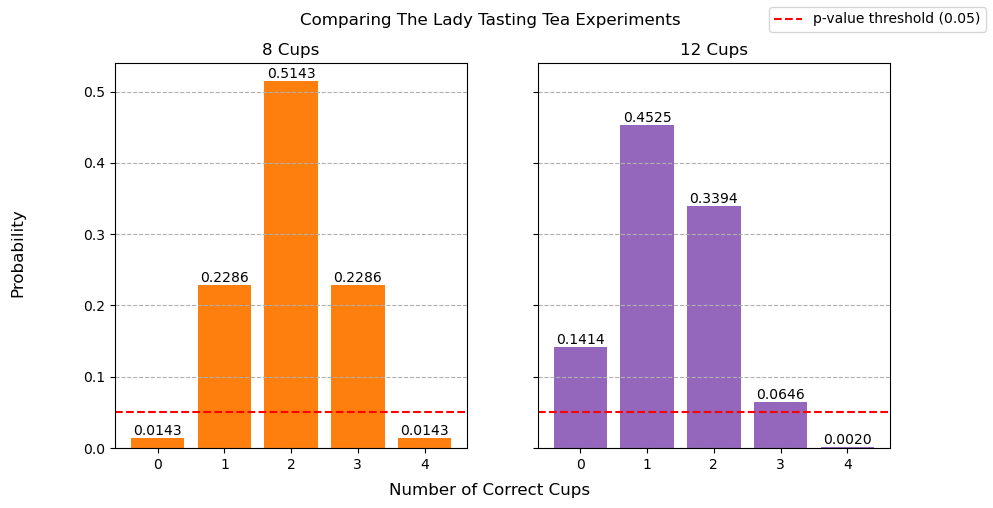

In [697]:
# Number of cups
orig_cups = 8

# Get the count.
count_8, prob_8 = get_count(orig_cups, milk_first, printing=True)

# Set x & y variables.
x_8 = count_8[0]
y_8 = prob_8

# Plot the probabilities.
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/categorical_variables.html
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# Set the colour.
color_8 = 'tab:orange'

# Generate the bar chart.
bar_comp_8 = axs[0].bar(x_8, y_8, color=color_8)
bar_comp_12 = axs[1].bar(x_12, y_12, color=color_12)

# Add title, labels and grid.
fig.suptitle(f"Comparing The Lady Tasting Tea Experiments")
fig.supxlabel("Number of Correct Cups")
fig.supylabel("Probability")
axs[0].set_title('8 Cups')
axs[1].set_title('12 Cups')
axs[0].grid(axis="y", linestyle='--')
axs[1].grid(axis="y", linestyle='--')
axs[0].bar_label(bar_comp_8, fmt='%.4f')
axs[1].bar_label(bar_comp_12, fmt='%.4f')
axs[0].axhline(y=y_pvalue, color='r', linestyle='--', label=f'p-value threshold ({y_pvalue})')
axs[1].axhline(y=y_pvalue, color='r', linestyle='--')
fig.legend()

# Show plot.
plt.show()

Looking at the results, there is about a 1.4% chance of picking all four correct cups when there are 8 cups in total, but only about a 0.2% chance when there are 12 cups. In the 8-cup experiment, getting none of the cups right is just as likely as getting all four right, and getting one right is just as likely as getting three right. This balance disappears in the 12-cup experiment, where some outcomes are more likely than others because there are more tea-first cups than milk-first cups.


|Correct Cups   |12 Cup Experiment  |8 Cup Experiment   |
|---------------|-------------------|-------------------|
|0 cups         |14.14%             |1.43%              |
|1 cups         |45.25%             |22.86%             |
|2 cups         |33.94%             |51.43%             |
|3 cups         |6.46%              |22.86%             |
|4 cups         |0.20%              |1.43%              |

In the original 8-cup experiment, Fisher used a p-value threshold of 0.05 to define statistical significance. This means that if all four cups were correctly identified, the probability of this happening by chance (about 1 in 70) would be well below the 1-in-20 threshold, leading to rejection of the null hypothesis that the selections were random.

In the 12-cup experiment, the probability of success under the null hypothesis is even smaller. As a result, there is less reason to relax the p-value threshold compared with the original design. In fact, the stronger experimental setup supports keeping the same threshold—or possibly making it more stringent—since a correct outcome is much less likely to occur by chance alone.

In [698]:
# Calculate the probabilities of choosing at least 1, 2, or 3 correct cups.
# https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html
at_least_12 = 1 - np.cumsum(prob_12[:3])
at_least_8 = 1 - np.cumsum(prob_8[:3])

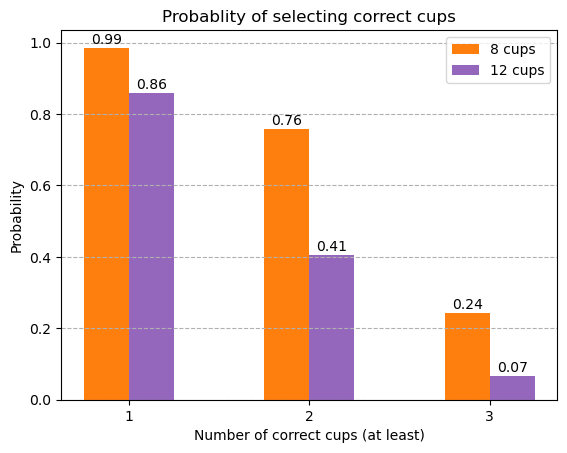

In [699]:
# Plot bar chart.
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html
fig, ax = plt.subplots()

x = ("1", "2", "3")
bars = np.arange(len(x))
width = 0.25

plot_8 = ax.bar(bars - 0.125, at_least_8, width=width, color='tab:orange', label='8 cups')
plot_12 = ax.bar(bars + 0.125, at_least_12, width=width, color='tab:purple', label='12 cups')

ax.set_xticks(bars, x)
ax.grid(axis='y', linestyle='--')
ax.legend()
ax.set_xlabel('Number of correct cups (at least)')
ax.set_ylabel('Probability')
ax.set_title('Probablity of selecting correct cups')
ax.bar_label(plot_8, fmt='%.2f', padding=1)
ax.bar_label(plot_12, fmt='%.2f', padding=1)

plt.show()



Plotting and comparing the probabilities of choosing at least 1, 2, or 3 correct cups further highlights how much harder the 12-cup experiment is than the 8-cup experiment. In the 8-cup case, there is about a 24% chance of correctly identifying at least three cups, while in the 12-cup case this chance drops to about 7%. This shows that as the number of cups increases, correctly identifying more cups becomes much less likely by chance alone.

|At Least   |12 Cup Experiment  |8 Cup Experiment   |
|-----------|-------------------|-------------------|
|1 cup      |85.86%             |98.57%             |
|2 cups     |40.61%             |75.71%             |
|3 cups     |6.67%              |24.29%             |

## Problem 2: Normal Distribution

A normal distribution (also called a Gaussian distribution or bell curve) is a continuous probability distribution that appears frequently in statistics, science, and real-world data. It describes how values tend to cluster around an average, with most values near the center and fewer occurring as you move farther away, forming a smooth, symmetric, bell-shaped curve.

References:
* https://en.wikipedia.org/wiki/Normal_distribution
* https://www.investopedia.com/terms/n/normaldistribution.asp

Let's use `numpy.random.normal` to generate 100,000 samples of size 10 from the standard normal distribution. The standard normal distribution has a mean of 0 and standard deviation of 1.

In [700]:
# Generate samples from the standard normal distibution.
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
samples = 100000
size = 10
mu = 0
sigma = 1

data = np.random.normal(loc=mu, scale=sigma, size=(samples, size))

Now let's use `numpy.std` to calculate the population standard deviation (ddof=0) and sample standard deviation (ddof=1) for each sample. We'll then plot histograms of both sets of values with `matplotlib`.

ddof=0: mean=0.9223636554598065, sd=0.22027174332960522
ddof=1: mean=0.9722566607372632, sd=0.23218680436585126


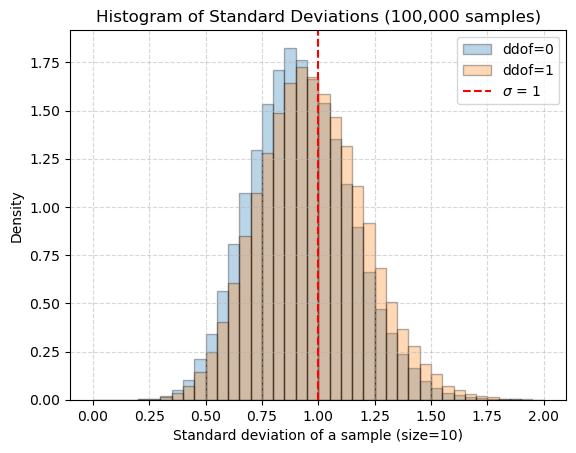

In [701]:
# Calculate the population standard deviation (ddof=0).
# https://numpy.org/doc/stable/reference/generated/numpy.std.html
# https://numpy.org/doc/stable/reference/generated/numpy.mean.html
# https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-sample/a/population-and-sample-standard-deviation-review

population_std = np.std(data, axis=1, ddof=0)
print(f'ddof=0: mean={np.mean(population_std)}, sd={np.std(population_std)}')

# Calculate the sample standard deviation (ddof=1).
sample_std = np.std(data, axis=1, ddof=1)
print(f'ddof=1: mean={np.mean(sample_std)}, sd={np.std(sample_std)}')

# Plot the histograms.
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

fig, ax = plt.subplots()

ax.hist(population_std, color='tab:blue',edgecolor='black', alpha=0.3, density=True, bins=np.linspace(0.0, 2.0, 41), label='ddof=0')
ax.hist(sample_std, color='tab:orange',edgecolor='black', alpha=0.3, density=True, bins=np.linspace(0.0, 2.0, 41), label='ddof=1')

# Add labels, legend and grid.
# https://matplotlib.org/stable/api/axes_api.html#matplotlib-axes
ax.set_title(f'Histogram of Standard Deviations ({samples:,} samples)')
ax.set_xlabel(f'Standard deviation of a sample (size={size})')
ax.set_ylabel('Density')
ax.axvline(x=sigma, color='r', linestyle='--', label=f'$\sigma$ = {sigma}')
ax.legend()
ax.grid(linestyle='--', alpha=0.5)


plt.show()

Looking at both histograms, we can see that ddof=0 is shifted slightly to the left of ddof=1. This suggests that ddof=0 is underestimating the true population standard deviation of 1. If we use `numpy.mean` to calculate the means of each set of values, we see that ddof=0 has a mean of 0.92 and ddof=1 has a mean of 0.97.

This is because population standard deviation formula divides by the number of data points N, while the sample standard deviation formula divides by one less than the number of data points in the sample, n-1.

Population standard deviation:

$\sigma = \sqrt{\dfrac{\Sigma(x_i - \bar x)^2}{N}}$

Sample standard deviation:

$s_x = \sqrt{\dfrac{\Sigma(x_i - \bar x)^2}{n-1}}$

References:
* [https://www.khanacademy.org/math/statistics-probability](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/variance-standard-deviation-sample/a/population-and-sample-standard-deviation-review)
* https://ashki23.github.io/markdown-latex.html#latex

As the sample size (n) increases, the standard deviation of the distribution decreases, resulting in a taller and narrower histogram.

Let’s increase the sample size from 10 to 100 and observe how this change affects the histograms.

ddof=0: mean=0.9924493675005467, sd=0.0704864037047655
ddof=1: mean=0.9974491440681361, sd=0.07084150118491635


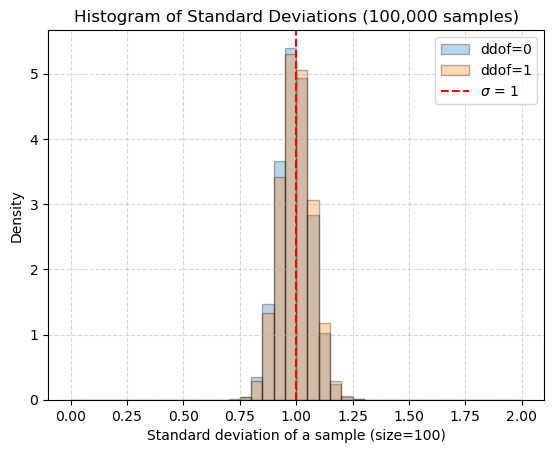

In [702]:
# Increase the sample size.
size_2 = 100
mu = 0
sigma = 1

data_2 = np.random.normal(loc=mu, scale=sigma, size=(samples, size_2))

# Calculate the population standard deviation (ddof=0).
population_std_2 = np.std(data_2, axis=1, ddof=0)
print(f'ddof=0: mean={np.mean(population_std_2)}, sd={np.std(population_std_2)}')

# Calculate the sample standard deviation (ddof=1).
sample_std_2 = np.std(data_2, axis=1, ddof=1)
print(f'ddof=1: mean={np.mean(sample_std_2)}, sd={np.std(sample_std_2)}')

# Plot the histograms.
fig, ax = plt.subplots()

ax.hist(population_std_2, color='tab:blue',edgecolor='black', alpha=0.3, density=True, bins=np.linspace(0.0, 2.0, 41), label='ddof=0')
ax.hist(sample_std_2, color='tab:orange',edgecolor='black', alpha=0.3, density=True, bins=np.linspace(0.0, 2.0, 41), label='ddof=1')
ax.axvline(x=sigma, color='r', linestyle='--', label=f'$\sigma$ = {sigma}')
ax.set_title(f'Histogram of Standard Deviations ({samples:,} samples)')
ax.set_xlabel(f'Standard deviation of a sample (size={size_2})')
ax.set_ylabel('Density')

ax.legend()
ax.grid(linestyle='--', alpha=0.5)

plt.show()

We can see that both histograms are more tightly spread around the true population mean of 1. The means of both ddof=0 and ddof=1 are now 0.99 and the standard deviation has decreased from 0.2 to 0.07. As the sample size increases the differences between the population standard deviation and sample standard deviation converge.

## Problem 3: t-Tests

T-tests are used to determine whether there is a statistically significant difference between the means of two groups. The null hypothesis states that the two group means are equal. A Type II error occurs when the test fails to reject the null hypothesis even though a true difference between the means exists.

Let's run independent sample t-tests on 2 samples of size 100, one from the standard normal distribution and one from the normal distribution with means ranging from $0.0, 0.1, 0.2, \dots, 1.0$ and investigate how the increasing difference in means affects the type II error rate.

References:
* https://www.youtube.com/watch?v=CIbJSX-biu0
* https://www.investopedia.com/terms/t/t-test.asp
* https://en.wikipedia.org/wiki/P-value

First, we'll generate the samples with `numpy.random.normal`.

In [703]:
# Generate samples.
size = 100 # sample size
sigma = 1 # standard deviation
mu = 0 # mean
d = np.arange(0.0, 1.1, 0.1) # mean difference
n = 1000 # number of simulations

sample_a = np.array(np.random.normal(loc=mu, scale=sigma, size=(n, size)))
sample_b = np.array([np.random.normal(loc=mean, scale=sigma, size=(n, size)) for mean in d])

# Check the shape of the arrays.
sample_a.shape, sample_b.shape

((1000, 100), (11, 1000, 100))

In [704]:
# Convert sample_a to 3D array.
# https://numpy.org/doc/stable/user/absolute_beginners.html#how-to-convert-a-1d-array-into-a-2d-array-how-to-add-a-new-axis-to-an-array
sample_a_3d = sample_a[np.newaxis, :, :]
sample_a_3d.shape

(1, 1000, 100)

Now that we have the two sample arrays with the same shape, we can use ``scipy.stats.ttest_ind`` to generate the p-values that we need to calculate the type II error rate.

In [705]:
# Run t-Tests.
# We only need the p-value's here.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
_, p_values = np.array(stats.ttest_ind(sample_a_3d, sample_b, axis=2))
p_values.shape

(11, 1000)

We now set the p-value threshold to 0.05 and count how many values in the p-value array are greater than this threshold. This tells us how many times the null hypothesis was not rejected.

Each value in the array that is less than or equal to 0.05 returns ``False``, while the remaining values return ``True.`` We then sum the ``True`` values and divide by the total number of values to obtain the proportion of times the null hypothesis was not rejected.

In [706]:
# Set the p-value threshold.
p_value = 0.05

# Calculate proportion of times the null hyptheses is not rejected.
not_rejected = p_values > p_value

# https://numpy.org/doc/stable/reference/generated/numpy.sum.html
sum_not_rejected = np.sum(not_rejected, axis=1)

prop_not_rejected = sum_not_rejected / n

We can now plot the proportion of type II errors against the mean differences using ``matplotlib.pyplot``.

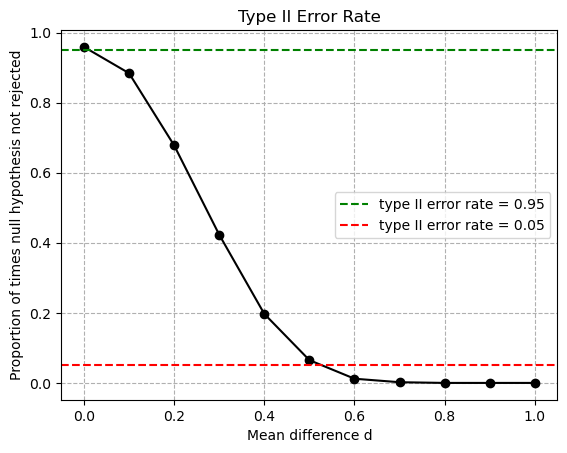

In [707]:
# Plot type II error rate.
fig, ax = plt.subplots()

# Set x and y values.
x = d
y = prop_not_rejected

ax.plot(x, y, 'o-', color='black')

# Set grid, title and labels.
ax.grid(linestyle='--')
ax.set_title('Type II Error Rate')
ax.set_xlabel('Mean difference d')
ax.set_ylabel('Proportion of times null hypothesis not rejected')
ax.axhline(y=1-p_value, color='g', linestyle='--', label=f'type II error rate = {1-p_value}')
ax.axhline(y=p_value, color='r', linestyle='--', label=f'type II error rate = {p_value}')
ax.legend()

plt.show()

At $d=0$ where there is no real difference, the Type II error rate is close to 95%, which is expected with a p-value threshold of 0.05, since the null hypothesis is true and is correctly not rejected most of the time. As $d$ increases, the Type II error rate drops quickly. By around $d=0.5$, it is close to 5%, and by $d≥0.7$, it is nearly zero, meaning the test almost always detects the difference.

## Problem 4: ANOVA

Analysis of variance (ANOVA) is a group of statistical methods used to compare the averages of two or more groups. It works by examining how much the group means differ from each other compared to how much the values vary within each group. If the differences between groups are much larger than the variation within groups, this suggests that the group means are not all the same. This comparison is carried out using an F-test.

References:
* https://en.wikipedia.org/wiki/Analysis_of_variance
* https://www.youtube.com/watch?v=EWYzeZbchR0&t=238s

Let’s generate three independent samples using ``numpy.random.normal``, each of size 30, from normal distributions with means 0.0, 0.5, and 1.0, all with a standard deviation of 1. We will then perform ANOVA and t-tests using ``scipy.stats`` and compare the results.

In [708]:
# Generate samples.
sigma = 1
size = 30

sample_one = np.random.normal(loc=0.0, scale=sigma, size=size)
sample_two = np.random.normal(loc=0.5, scale=sigma, size=size)
sample_three = np.random.normal(loc=1.0, scale=sigma, size=size)

We can plot the three samples on a box plot using ``seaborn``, and visualize the differences between the groups.

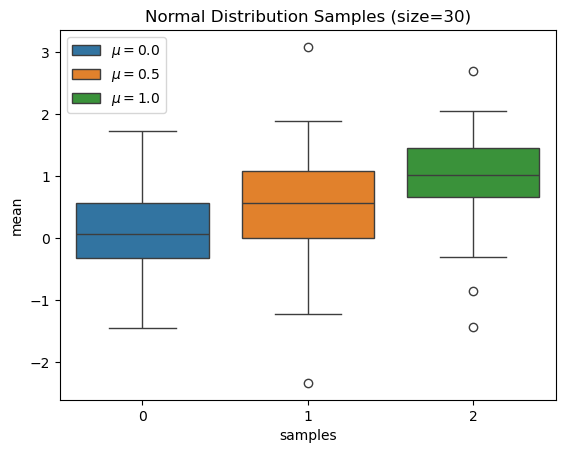

In [709]:
# Plot the samples.
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
fig, ax = plt.subplots()

sample_data = [sample_one, sample_two, sample_three]
sns.boxplot(sample_data)
ax.set_xlabel('samples')
ax.set_ylabel('mean')
ax.set_title(f'Normal Distribution Samples (size={size})')
ax.legend(['$\mu=0.0$', '$\mu=0.5$', '$\mu=1.0$'])

plt.show()

Now let's permform the ANOVA test using ``scipy.stats.f_oneway``. The [one-way ANOVA](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html) tests the null hypothesis that groups have the same population mean. The associated p-value is only valid if the following assumptions are met.

* The samples are independent.

* Each sample is from a normally distributed population.

* The population standard deviations of the groups are all equal.


In [710]:
# Perform ANOVA test.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
stats.f_oneway(sample_one, sample_two, sample_three)

F_onewayResult(statistic=6.512184724279329, pvalue=0.002314644081692508)

As the p-value is significantly less than the 0.05 threshold, we can reject the null hypothesis that the three samples have the same population mean. We can use a post hoc test such as Tukey's HSD to identify which samples differ.

In [711]:
# Perform Tukey HSD test.
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html#scipy.stats.tukey_hsd
print(stats.tukey_hsd(sample_one, sample_two, sample_three))

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.373     0.259    -0.936     0.189
 (0 - 2)     -0.849     0.002    -1.412    -0.287
 (1 - 0)      0.373     0.259    -0.189     0.936
 (1 - 2)     -0.476     0.114    -1.038     0.087
 (2 - 0)      0.849     0.002     0.287     1.412
 (2 - 1)      0.476     0.114    -0.087     1.038



Now let's run individual t-test's on each sample pair using ``scipy.stats.ttest_ind`` and analyse the results. A p-value of less than or equal to 0.05 would suggest that we can reject the null hypothesis that the means of the samples are the same.

In [712]:
# Perform individual t_Tests.
_, p_value0 = stats.ttest_ind(sample_one, sample_two)
_, p_value1 = stats.ttest_ind(sample_one, sample_three)
_, p_value2 = stats.ttest_ind(sample_two, sample_three)

print(f'Comparison                 p-value')
print(f'(sample 1 vs sample 2)     {p_value0}')
print(f'(sample 1 vs sample 3)     {p_value1}')
print(f'(sample 2 vs sample 3)     {p_value2}')

Comparison                 p-value
(sample 1 vs sample 2)     0.1243507229618761
(sample 1 vs sample 3)     0.0002220005208448561
(sample 2 vs sample 3)     0.06321435267651379


Why use ANOVA over running multiple t-tests?

Although each individual t-test is performed at the 5% significance level, conducting many t-tests increases the chance of making at least one false rejection. As more tests are carried out, these small error probabilities accumulate, leading to a much higher overall risk of incorrectly finding a significant result. This phenomenon explains why performing multiple unadjusted t-tests inflates the Type I error rate. For this reason, one-way ANOVA is preferred when comparing more than two groups, as it controls the overall error rate.

References:

* https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-2.php
* https://www.geeksforgeeks.org/data-science/difference-between-t-test-and-anova/
* https://www.statsig.com/perspectives/control-type-i-errors


## End